# Write a Monte-Carlo simulation of a game of chance (e.g., craps, roulette, etc.)  Post your flowchart, code, and some examples.

## Craps https://www.randomservices.org/random/games/Craps.html

### Rules
The player (known as the shooter) rolls a pair of fair dice

* If the sum is 7 or 11 on the first throw, the shooter wins; this event is called a natural.
* If the sum is 2, 3, or 12 on the first throw, the shooter loses; this event is called craps.
* If the sum is 4, 5, 6, 8, 9, or 10 on the first throw, this number becomes the shooter's point. The shooter continues rolling the dice until either she rolls the point again (in which case she wins) or rolls a 7 (in which case she loses).

In [1]:
import seaborn as sns
import random
import numpy as np

In [2]:
def roll_dice():
    """
    Roll a pair of fair, 6-sided die
    """
    dice1, dice2 = random.choices(range(1, 7))[0], random.choices(range(1, 7))[0]
    return dice1, dice2, dice1 + dice2

In [3]:
def play_craps():
    """
    After rolling the die: 
     - If the sum is 7 or 11 on the first throw, the shooter wins; this event is called a natural.
     - If the sum is 2, 3, or 12 on the first throw, the shooter loses; this event is called craps.
     - If the sum is 4, 5, 6, 8, 9, or 10 on the first throw, this number becomes the shooter's point. 
       - The shooter continues rolling the dice until either she rolls the point again (in which case she wins) 
       or rolls a 7 (in which case she loses).
       
    Returns the a tuple with length of 3 or 4, as folows:
        [0] = "Win" or "Lose"
        [1] = number of rolls before the game ended
        [2] = die sum on last roll (if the first roll was a win or lose, this is also the first roll)
        [3] = die sum on first roll (if the first roll was a win or lose, this is omitted)
    """
    num_rolls = 0  ## Keep track of the number of rolls in the game
    d1, d2, first_roll_die_sum = roll_dice()
    num_rolls+=1
    #print(f"Roll {num_rolls} = {first_roll_die_sum}")
    if first_roll_die_sum in [7,11]: ## "Natural"
        return "Win", num_rolls, first_roll_die_sum
    elif first_roll_die_sum in [2,3,12]: ## "Craps"
        return "Lose", num_rolls, first_roll_die_sum
    else:  ## "Shooter's Point"
        point = first_roll_die_sum
        while True: ## Continue Rolling if not equal to 7 or shooter's point
            num_rolls+=1
            d1, d2, die_sum = roll_dice()
            #print(f"Roll {num_rolls} = {die_sum}")
            if die_sum == point: # If the second or subsequent roll equals the shooter's point
                return "Win", num_rolls, die_sum, first_roll_die_sum
            elif die_sum == 7:  # If the second or subsequent roll equals 7
                return "Lose", num_rolls, die_sum, first_roll_die_sum

In [4]:
def sim_many_trials(num_trials):
    trial = 0
    trials = []
    results = []
    for i in range(num_trials):
        result = play_craps()
        trial+=1
        trials.append(trial)
        results.append(result)
    trial_results = dict(zip(trials, results))
    return trial_results

In [5]:
trial_results = sim_many_trials(10000)

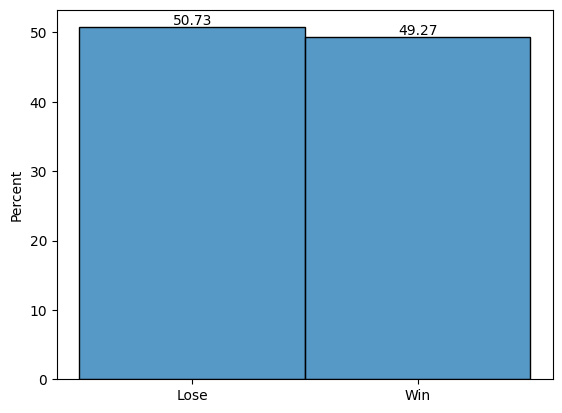

In [6]:
data = np.array([v[0] for k, v in trial_results.items()])
ax = sns.histplot(data=data, stat="percent")

for i in ax.containers:
    ax.bar_label(i,)

In [7]:
play_craps()

('Lose', 3, 7, 6)

In [ ]:
def bets(amount_bet):
    result = play_craps()
    
    # A pass bet is a bet that the shooter will win and pays 1:1.
    if result[0] == 'Win': 
        #(for every $1 you bet, you'll win $1 if your bet wins)
        return amount_bet
    else:
        return -amount_bet
    
    # A don't pass bet is a bet that the shooter will lose, except that 12 on the first throw is excluded 
    #(that is, the shooter loses, of course, but the don't pass better neither wins nor loses). 
    #This is the meaning of the phrase don't pass bar double 6 on the craps table. The don't pass bet also pays 1:1
    if result[0] == 'Lose' or (len(result) == 4 and result[3] != 12) or (len(result == 3) and result(2) != 12):
        return amount_bet
    elif result[0] == 'Lose' and (len(result) == 4 and result[3] == 12) or (len(result == 3) and result(2) == 12):
        return 0
    else:
        return -amount_bet

        